In [1]:
# import modules
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
from parse import parse
import pandas as pd
import os

In [23]:
# base data folder and time window (in minutes!) to consider
data_folder = "../data/azurefunctions-dataset2019"
time_window = 10

In [172]:
# read dataset
all_data = pd.DataFrame()
for filename in os.listdir(data_folder):
  if filename.startswith("invocations_"):
    # which day is it
    day = int(parse("invocations_per_function_md.anon.d{}.csv", filename)[0])
    # load data
    data = pd.read_csv(os.path.join(data_folder, filename))
    data["DAY"] = [day] * len(data)
    # merge
    all_data = pd.concat([all_data, data], ignore_index = True)

In [3]:
# filter http requests
http_data = pd.DataFrame()
if os.path.exists(os.path.join(data_folder, "http_data.csv")):
  http_data = pd.read_csv(os.path.join(data_folder, "http_data.csv"))
else:
  http_data = all_data[all_data["Trigger"] == "http"]
  http_data.describe()
  http_data.to_csv(os.path.join(data_folder, "http_data.csv"), index = False)

In [4]:
# group by function ID
functions = http_data.groupby("HashFunction").groups
len(functions)

30440

In [5]:
# filter functions that have been executed in all the 14 days
alldays_functions = []
if not os.path.exists(os.path.join(data_folder, "alldays_functions.txt")):
  # build
  for fid in functions:
    if len(http_data[http_data["HashFunction"] == fid]) >= 14:
      alldays_functions.append(fid)
  # write
  with open(os.path.join(data_folder, "alldays_functions.txt"), "w") as ost:
    for line in alldays_functions:
      ost.write(f"{line}\n")
else:
  # read
  with open(os.path.join(data_folder, "alldays_functions.txt"), "r") as ist:
    alldays_functions = [fid[:-1] for fid in ist.readlines()]

len(alldays_functions)

6385

In [195]:
fid = alldays_functions[1000]
fid_data = http_data[http_data["HashFunction"] == fid].set_index("DAY")
fid_data

,HashOwner,HashApp,HashFunction,Trigger,1,2,3,4,5,6,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
DAY,,,,,,,,,,,,,,,,,,,,,
13,619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...,1d8869698743d5138e3ef64781e9be9c241db94d795019...,27726bacce9214f9085b424591916a78eb39766a775ea2...,http,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
7,619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...,1d8869698743d5138e3ef64781e9be9c241db94d795019...,27726bacce9214f9085b424591916a78eb39766a775ea2...,http,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...,1d8869698743d5138e3ef64781e9be9c241db94d795019...,27726bacce9214f9085b424591916a78eb39766a775ea2...,http,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0
12,619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...,1d8869698743d5138e3ef64781e9be9c241db94d795019...,27726bacce9214f9085b424591916a78eb39766a775ea2...,http,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...,1d8869698743d5138e3ef64781e9be9c241db94d795019...,27726bacce9214f9085b424591916a78eb39766a775ea2...,http,0,0,0,0,0,0,...,0,0,0,1,0,0,2,0,0,0
10,619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...,1d8869698743d5138e3ef64781e9be9c241db94d795019...,27726bacce9214f9085b424591916a78eb39766a775ea2...,http,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...,1d8869698743d5138e3ef64781e9be9c241db94d795019...,27726bacce9214f9085b424591916a78eb39766a775ea2...,http,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...,1d8869698743d5138e3ef64781e9be9c241db94d795019...,27726bacce9214f9085b424591916a78eb39766a775ea2...,http,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...,1d8869698743d5138e3ef64781e9be9c241db94d795019...,27726bacce9214f9085b424591916a78eb39766a775ea2...,http,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
fid_invocations = fid_data[[str(i) for i in range(1,1441)]].transpose()
fid_invocations

DAY,13,7,6,12,4,10,11,5,1,14,2,3,8,9
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1437,0,0,0,0,2,0,0,0,0,0,0,0,0,0
1438,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1439,2,0,0,0,0,0,0,0,0,0,0,0,0,0


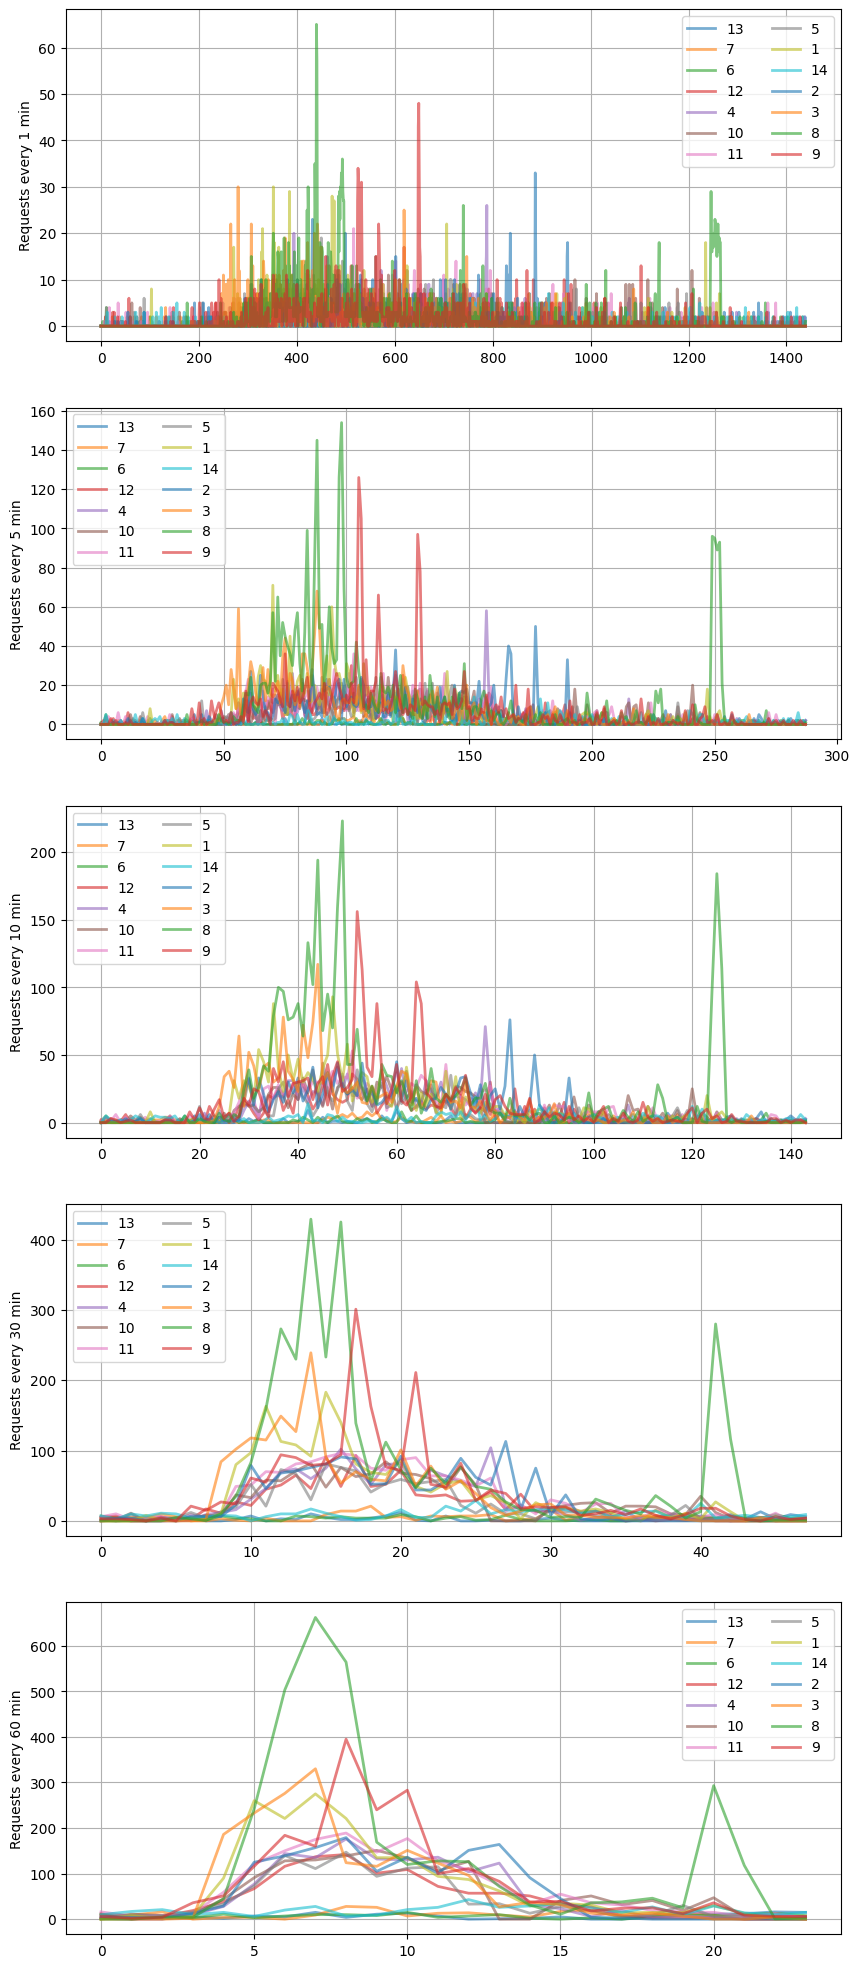

In [197]:
fid_invocations_grouped = {}
for window in [1, 5, 10, 30, 60]:
  fid_invocations_grouped[window] = {}
  for day in fid_invocations:
    fid_invocations_grouped[window][day] = [
      sum(fid_invocations[day][i*window:(i+1)*window]) 
        for i in range(int(len(fid_invocations)/window))
    ]
  fid_invocations_grouped[window] = pd.DataFrame(
    fid_invocations_grouped[window]
  )

_, axs = plt.subplots(
  nrows = 5,
  ncols = 1,
  figsize = (10, 25)
)
idx = 0
for window, window_data in fid_invocations_grouped.items():
  window_data.plot(
    alpha = 0.6, 
    linewidth = 2,
    ax = axs[idx],
    # legend = False,
    grid = True
  )
  axs[idx].set_ylabel(f"Requests every {window} min")
  axs[idx].legend(ncol = 2)
  idx += 1
plt.show()

# fid_invocations.rolling(window = 60, min_periods = 60).sum().plot(alpha = 0.6, linewidth = 2)
# plt.show()

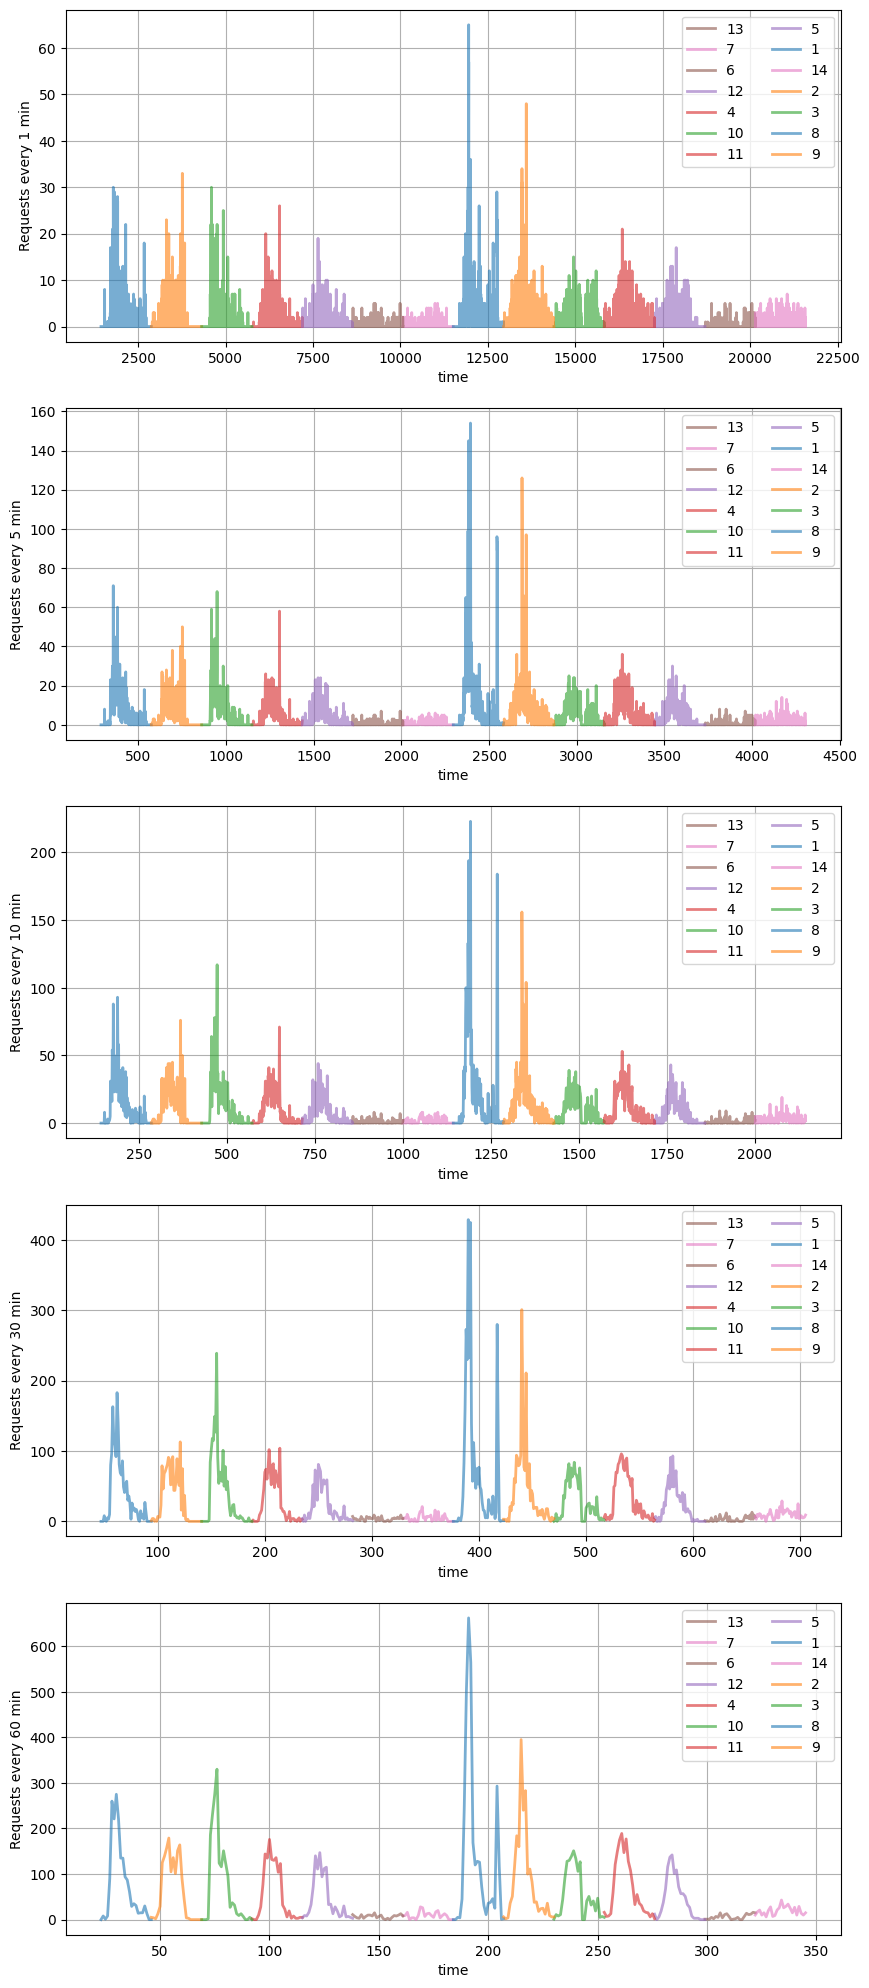

In [202]:
fid_invocations_grouped = {}
for window in [1, 5, 10, 30, 60]:
  fid_invocations_grouped[window] = {}
  for day in fid_invocations:
    fid_invocations_grouped[window][day] = [
      sum(fid_invocations[day][i*window:(i+1)*window]) 
        for i in range(int(len(fid_invocations)/window))
    ]
  fid_invocations_grouped[window] = pd.DataFrame(
    fid_invocations_grouped[window]
  )

colors = list(mcolors.TABLEAU_COLORS.values())[:7] * 2
_, axs = plt.subplots(
  nrows = 5,
  ncols = 1,
  figsize = (10, 25)
)
idx = 0
for window, window_data in fid_invocations_grouped.items():
  for day in window_data.columns:
    to_plot = pd.DataFrame(window_data[day].copy(deep = True))
    to_plot["time"] = to_plot.index + day * to_plot.index.max()
    to_plot.plot(
      x = "time",
      y = day,
      alpha = 0.6, 
      linewidth = 2,
      ax = axs[idx],
      color = colors[day - 1],
      # legend = False,
      grid = True
    )
  axs[idx].set_ylabel(f"Requests every {window} min")
  axs[idx].legend(ncol = 2)
  idx += 1
plt.show()

In [6]:
alldays_functions_df = http_data.set_index("HashFunction").loc[alldays_functions]
alldays_functions_df.to_csv(os.path.join(data_folder, "alldays_functions.csv"))
alldays_functions_df.describe()

,1,2,3,4,5,6,7,8,9,10,...,1432,1433,1434,1435,1436,1437,1438,1439,1440,DAY
count,89390.000000,89390.000000,89390.000000,89390.000000,89390.000000,89390.000000,89390.000000,89390.000000,89390.000000,89390.000000,...,89390.000000,89390.000000,89390.000000,89390.000000,89390.000000,89390.000000,89390.000000,89390.000000,89390.000000,89390.000000
mean,23.505191,20.406611,19.353910,20.173375,19.561316,19.734433,19.351102,19.333281,19.241224,19.031357,...,18.828784,18.525036,19.161215,18.775847,19.176138,19.064560,18.831458,18.815371,18.503188,7.500000
std,933.698073,777.296869,749.058587,767.043364,731.897636,731.300034,747.250553,759.589108,747.729042,750.682670,...,768.300929,744.238953,761.816685,731.979205,736.697294,755.994761,759.274982,747.191425,751.502508,4.031151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
max,75217.000000,65324.000000,60724.000000,61957.000000,60878.000000,59370.000000,63283.000000,61412.000000,60450.000000,62496.000000,...,64841.000000,60062.000000,61541.000000,60310.000000,60140.000000,63306.000000,61661.000000,60447.000000,61655.000000,14.000000


In [ ]:
alldays_functions_df

,HashOwner,HashApp,Trigger,1,2,3,4,5,6,7,...,1432,1433,1434,1435,1436,1437,1438,1439,1440,DAY
HashFunction,,,,,,,,,,,,,,,,,,,,,
0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88afbd1621fabbf97f1a,1e6aa0ace3f2c0df114126e303bd6c84343690c7bb3634...,d0c1af9d7aa9c97fc6495af1a7283f3d1799ce13868623...,http,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88afbd1621fabbf97f1a,1e6aa0ace3f2c0df114126e303bd6c84343690c7bb3634...,d0c1af9d7aa9c97fc6495af1a7283f3d1799ce13868623...,http,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88afbd1621fabbf97f1a,1e6aa0ace3f2c0df114126e303bd6c84343690c7bb3634...,d0c1af9d7aa9c97fc6495af1a7283f3d1799ce13868623...,http,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88afbd1621fabbf97f1a,1e6aa0ace3f2c0df114126e303bd6c84343690c7bb3634...,d0c1af9d7aa9c97fc6495af1a7283f3d1799ce13868623...,http,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88afbd1621fabbf97f1a,1e6aa0ace3f2c0df114126e303bd6c84343690c7bb3634...,d0c1af9d7aa9c97fc6495af1a7283f3d1799ce13868623...,http,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff7862e80476cf8e355d27b856679f5bda38161b1d52d67445116e7d18271a0,dcc221062c4b0a281b332a48dd98b53e609ceda743d2e6...,01857570bb7d57960c0369c93e53f2cd9577226229a443...,http,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
fff7862e80476cf8e355d27b856679f5bda38161b1d52d67445116e7d18271a0,dcc221062c4b0a281b332a48dd98b53e609ceda743d2e6...,01857570bb7d57960c0369c93e53f2cd9577226229a443...,http,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
fff7862e80476cf8e355d27b856679f5bda38161b1d52d67445116e7d18271a0,dcc221062c4b0a281b332a48dd98b53e609ceda743d2e6...,01857570bb7d57960c0369c93e53f2cd9577226229a443...,http,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [205]:
# count owners
alldays_functions_df.groupby("HashOwner").ngroups

2598

In [7]:
all_invocations = pd.DataFrame()
for (owner, app), oa_functions in alldays_functions_df.groupby(
    ["HashOwner", "HashApp"]
  ):
  for fid, oaid_data in oa_functions.groupby("HashFunction"):
    # extract invocations
    oaid_invocations = oaid_data.set_index("DAY")[
      [str(i) for i in range(1,1441)]
    ].transpose()
    # group by window
    oaid_invocations_grouped = {}
    for day in oaid_invocations:
      oaid_invocations_grouped[day] = [
        sum(oaid_invocations[day][i*time_window:(i+1)*time_window]) 
          for i in range(int(len(oaid_invocations)/time_window))
      ]
    oaid_invocations_grouped = pd.DataFrame(oaid_invocations_grouped)
    # add hash information
    l = len(oaid_invocations_grouped)
    oaid_invocations_grouped["HashOwner"] = [owner] * l
    oaid_invocations_grouped["HashApp"] = [app] * l
    oaid_invocations_grouped["HashFunction"] = [fid] * l
    oaid_invocations_grouped["time"] = oaid_invocations_grouped.index
    # concat
    all_invocations = pd.concat(
      [all_invocations, oaid_invocations_grouped], ignore_index = True
    )

all_invocations.to_csv(
  os.path.join(data_folder, f"alldays_http_invocations_{time_window}min.csv"), 
  index = False
)

In [8]:
all_invocations

,13,7,6,12,4,10,11,5,1,14,2,3,8,9,HashOwner,HashApp,HashFunction,time
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00120a3b2acd94c5dab17ee482c500a76294c4e54fe32e...,5151a3e2694a55b3c2c8e6373f7f731ffb510bbbf36611...,c42de74e2dd1b922a8e2319a6c7e513ee4cd91f8766020...,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00120a3b2acd94c5dab17ee482c500a76294c4e54fe32e...,5151a3e2694a55b3c2c8e6373f7f731ffb510bbbf36611...,c42de74e2dd1b922a8e2319a6c7e513ee4cd91f8766020...,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00120a3b2acd94c5dab17ee482c500a76294c4e54fe32e...,5151a3e2694a55b3c2c8e6373f7f731ffb510bbbf36611...,c42de74e2dd1b922a8e2319a6c7e513ee4cd91f8766020...,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00120a3b2acd94c5dab17ee482c500a76294c4e54fe32e...,5151a3e2694a55b3c2c8e6373f7f731ffb510bbbf36611...,c42de74e2dd1b922a8e2319a6c7e513ee4cd91f8766020...,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00120a3b2acd94c5dab17ee482c500a76294c4e54fe32e...,5151a3e2694a55b3c2c8e6373f7f731ffb510bbbf36611...,c42de74e2dd1b922a8e2319a6c7e513ee4cd91f8766020...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919435,1,1,1,1,1,1,1,1,1,1,1,1,1,1,ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc294...,4070b1f96eb6f0c01f72134b4f08efda402b9cdffdd85d...,43db8355f80b8775d137d00fb1ef11a4d6c2bb1f8a1f4f...,139
919436,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc294...,4070b1f96eb6f0c01f72134b4f08efda402b9cdffdd85d...,43db8355f80b8775d137d00fb1ef11a4d6c2bb1f8a1f4f...,140
919437,1,1,1,1,1,1,1,1,1,1,1,1,1,1,ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc294...,4070b1f96eb6f0c01f72134b4f08efda402b9cdffdd85d...,43db8355f80b8775d137d00fb1ef11a4d6c2bb1f8a1f4f...,141
919438,1,1,1,1,1,1,1,1,1,1,1,1,1,1,ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc294...,4070b1f96eb6f0c01f72134b4f08efda402b9cdffdd85d...,43db8355f80b8775d137d00fb1ef11a4d6c2bb1f8a1f4f...,142


In [9]:
fid = alldays_functions[500]
fid

'142fd859b4b21a2906c44711b6cadc540f56df771c2798bac17be9d68e80d096'

<Axes: xlabel='time'>

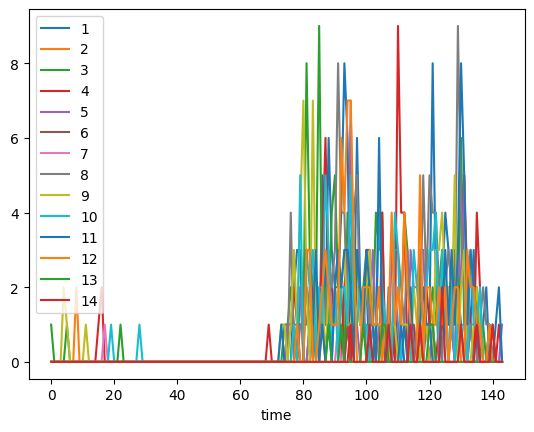

In [10]:
all_invocations[all_invocations["HashFunction"] == fid][
  ["time"] + list(range(1,15))
].plot(
  x = "time"
)

In [11]:
def compute_statistics(data: pd.DataFrame, groupkey: str) -> pd.DataFrame:
  all_stats = pd.DataFrame()
  for _, grouped_data in data.groupby(groupkey):
    df = grouped_data[
      list(range(1,15))
    ].rename(columns = {k: f"req{k}" for k in range(1,15)})
    idx = df.index
    df["idx"] = idx
    df = pd.wide_to_long(df, stubnames = ["req"], i = "idx", j = "day")
    # compute statistics
    stats = pd.DataFrame(df.describe()).transpose()
    stats["idx_min"] = min(idx)
    stats["idx_max"] = max(idx)
    # merge
    all_stats = pd.concat([all_stats, stats], ignore_index = True)
  return all_stats

In [12]:
# get distribution
all_stats = compute_statistics(all_invocations, "HashFunction")

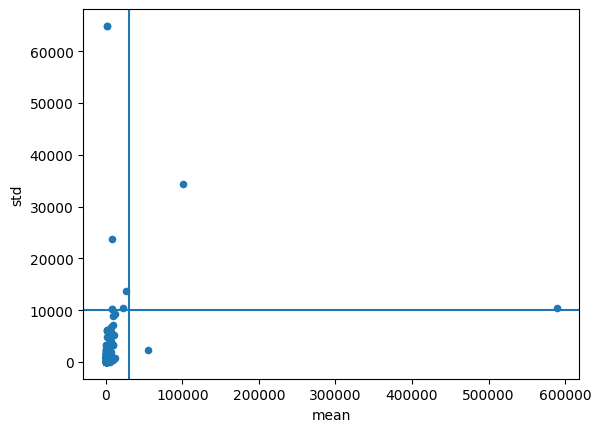

In [17]:
ax = all_stats[["mean", "std"]].plot.scatter(x="mean", y="std")
ax.axhline(y = 10000)
ax.axvline(x = 0.3e5)

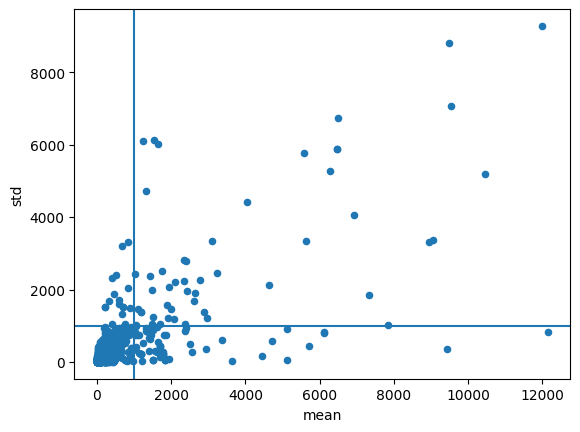

In [20]:
ax = all_stats[
  (all_stats["std"] < 10000) & (all_stats["mean"] < 0.5e5)
][["mean", "std"]].plot.scatter(x="mean", y="std")
ax.axhline(y = 1000)
ax.axvline(x = 1000)


,idx_min,idx_max
0,115056,115199
1,318240,318383
2,614736,614879
3,414288,414431
5,388944,389087
...,...,...
6380,669888,670031
6381,394704,394847
6382,199440,199583
6383,482976,483119


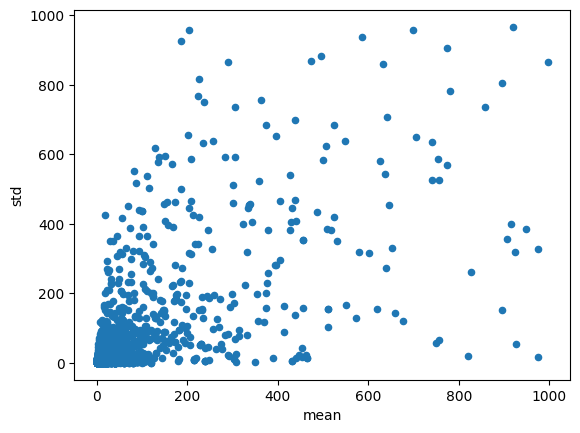

In [21]:
ax = all_stats[
  (all_stats["std"] < 1000) & (all_stats["mean"] < 1000)
][["mean", "std"]].plot.scatter(x="mean", y="std")

valid_idx_boundaries = all_stats[
  (all_stats["std"] < 1000) & (all_stats["mean"] < 1000)
][["idx_min", "idx_max"]]
valid_idx_boundaries

In [22]:
# filter invocations based on the selected indices
valid_idxs = []
for i in range(len(valid_idx_boundaries)):
  idx_min = valid_idx_boundaries.iloc[i]["idx_min"]
  idx_max = valid_idx_boundaries.iloc[i]["idx_max"]
  valid_idxs += list(range(idx_min, idx_max + 1))

filtered_invocations = all_invocations.loc[valid_idxs]
len(filtered_invocations)

899280

In [35]:
def flatten_invocations(data: pd.DataFrame, groupkey: str) -> pd.DataFrame:
  flat_invocations = pd.DataFrame()
  for fid, basedf in data.groupby(groupkey):
    # concatenate days
    df = basedf[list(range(1,15))].rename(
      columns = {k: f"req{k}" for k in range(1,15)}
    )
    df["fid"] = [fid] * len(df)
    df["hour"] = range(1, len(df) + 1)
    onecol_df = pd.wide_to_long(
      df, stubnames = ["req"], i = ["fid", "hour"], j = "day"
    )
    # merge
    flat_invocations = pd.concat(
      [flat_invocations, onecol_df.reset_index()], ignore_index = True
    )
  return flat_invocations

In [169]:
# flatten invocations
flat_invocations = flatten_invocations(filtered_invocations, "HashFunction")
flat_invocations.to_csv(
  os.path.join(data_folder, f"flat_invocations_{time_window}min.csv"), 
  index = False
)
flat_invocations

,fid,hour,day,req
0,0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...,1,1,1
1,0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...,1,2,1
2,0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...,1,3,1
3,0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...,1,4,1
4,0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...,1,5,1
...,...,...,...,...
2098987,fff7862e80476cf8e355d27b856679f5bda38161b1d52d...,24,10,19
2098988,fff7862e80476cf8e355d27b856679f5bda38161b1d52d...,24,11,11
2098989,fff7862e80476cf8e355d27b856679f5bda38161b1d52d...,24,12,46
2098990,fff7862e80476cf8e355d27b856679f5bda38161b1d52d...,24,13,17


In [24]:
# sum over all functions from each owner
all_invocations["HashApp"] += "-"
all_invocations["HashFunction"] += "-"
by_owner_invocations = all_invocations.groupby(["HashOwner", "time"]).sum()

by_owner_invocations#.reset_index()

13     7     6  \
HashOwner                                          time                     
00120a3b2acd94c5dab17ee482c500a76294c4e54fe32eb... 0     1676  1839  2050   
                                                   1     1605  1835  2021   
                                                   2     1605  1830  2044   
                                                   3     1618  1882  2054   
                                                   4     1588  1829  2044   
...                                                       ...   ...   ...   
ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc2941... 139      1     1     1   
                                                   140      0     0     0   
                                                   141      1     1     1   
                                                   142      1     1     1   
                                                   143      0     0     0   

                                                           12     4    10  \
HashOwner                                          time                     
00120a3b2acd94c5dab17ee482c500a76294c4e54fe32eb... 0     2053  2143  2046   
                                                   1     2009  2150  2092   
                                                   2     2011  2162  2048   
                                                   3     2000  2172  2035   
                                                   4     2034  2174  2045   
...                                                       ...   ...   ...   
ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc2941... 139      1     1     1   
                                                   140      0     0     0   
                                                   141      1     1     1   
                                                   142      1     1     1   
                                                   143      0     0     0   

                                                           11     5     1  \
HashOwner                                          time                     
00120a3b2acd94c5dab17ee482c500a76294c4e54fe32eb... 0     2085  2127  2043   
                                                   1     2058  2093  2046   
                                                   2     2053  2104  2043   
                                                   3     2005  2156  2051   
                                                   4     2023  2089  2013   
...                                                       ...   ...   ...   
ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc2941... 139      1     1     1   
                                                   140      0     0     0   
                                                   141      1     1     1   
                                                   142      1     1     1   
                                                   143      0     0     0   

                                                           14     2     3  \
HashOwner                                          time                     
00120a3b2acd94c5dab17ee482c500a76294c4e54fe32eb... 0     1469  2058  2299   
                                                   1     1441  2076  2330   
                                                   2     1430  2090  2267   
                                                   3     1416  2061  2272   
                                                   4     1413  2079  2293   
...                                                       ...   ...   ...   
ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc2941... 139      1     1     1   
                                                   140      0     0     0   
                                                   141      1     1     1   
                                                   142      1     1     1   
                                                   143      0     0     0   

                                                   

In [25]:
bo_stats = compute_statistics(by_owner_invocations.reset_index(), "HashOwner")
bo_stats

,count,mean,std,min,25%,50%,75%,max,idx_min,idx_max
0,2016.0,1560.398313,313.635420,926.0,1287.75,1461.5,1827.25,2347.0,0,143
1,2016.0,0.845238,1.055698,0.0,0.00,1.0,1.00,10.0,144,287
2,2016.0,3.943948,7.900770,0.0,0.00,1.0,5.00,87.0,288,431
3,2016.0,0.476190,1.515979,0.0,0.00,0.0,0.00,23.0,432,575
4,2016.0,2.444444,1.274249,1.0,2.00,2.0,2.00,17.0,576,719
...,...,...,...,...,...,...,...,...,...,...
2593,2016.0,3.996528,0.115704,0.0,4.00,4.0,4.00,6.0,373392,373535
2594,2016.0,6.968750,8.725111,0.0,1.00,3.0,11.00,109.0,373536,373679
2595,2016.0,9.429067,5.324127,1.0,5.00,5.0,13.00,22.0,373680,373823
2596,2016.0,39.349702,0.725454,19.0,39.00,39.0,40.00,41.0,373824,373967


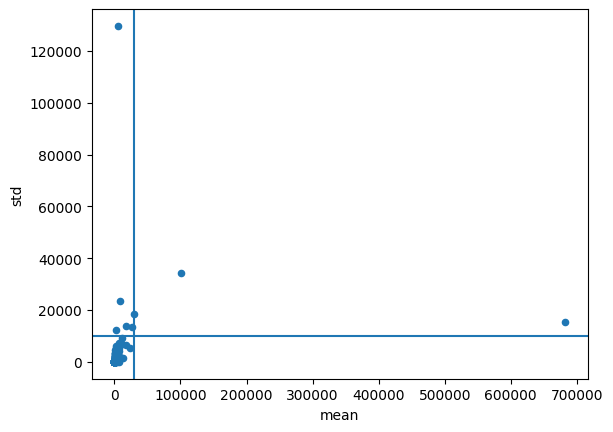

In [28]:
ax = bo_stats[["mean", "std"]].plot.scatter(x="mean", y="std")
ax.axhline(y = 10000)
ax.axvline(x = 0.3e5)

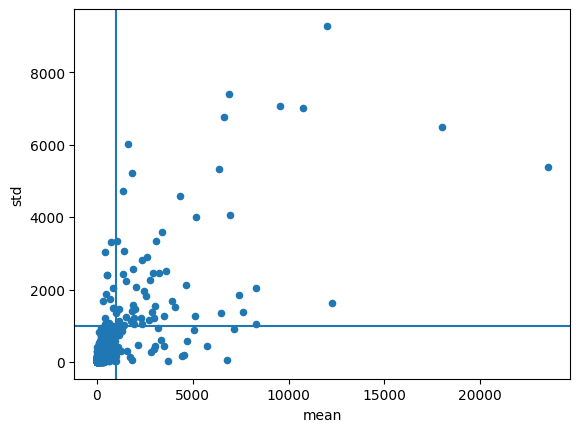

In [31]:
ax = bo_stats[
  (bo_stats["std"] < 10000) & (bo_stats["mean"] < 0.3e5)
][["mean", "std"]].plot.scatter(x="mean", y="std")
ax.axhline(y = 1000)
ax.axvline(x = 1000)

,idx_min,idx_max
19,2736,2879
20,2880,3023
21,3024,3167
26,3744,3887
29,4176,4319
...,...,...
2580,371520,371663
2583,371952,372095
2587,372528,372671
2592,373248,373391


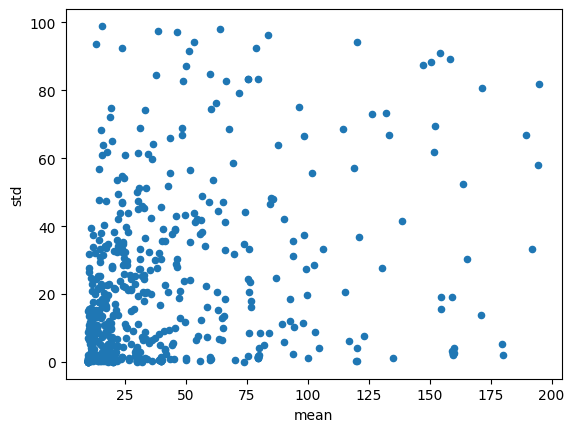

In [44]:
ax = bo_stats[
  (bo_stats["std"] < 100) & (bo_stats["mean"] < 200) & (bo_stats["mean"] > 10)
][["mean", "std"]].plot.scatter(x="mean", y="std")

valid_idx_boundaries = bo_stats[
  (bo_stats["std"] < 100) & (bo_stats["mean"] < 200) & (bo_stats["mean"] > 10)
][["idx_min", "idx_max"]]
valid_idx_boundaries

In [45]:
# filter invocations based on the selected indices
valid_idxs = []
for i in range(len(valid_idx_boundaries)):
  idx_min = valid_idx_boundaries.iloc[i]["idx_min"]
  idx_max = valid_idx_boundaries.iloc[i]["idx_max"]
  valid_idxs += list(range(idx_min, idx_max + 1))

by_owner_invocations = by_owner_invocations.reset_index()
filtered_invocations = by_owner_invocations.loc[valid_idxs]
len(filtered_invocations)

77184

In [46]:
# flatten invocations
bo_flat_invocations = flatten_invocations(filtered_invocations, "HashOwner")
bo_flat_invocations.to_csv(
  os.path.join(data_folder, f"by_owner_flat_invocations_{time_window}min.csv"), 
  index = False
)
bo_flat_invocations

,fid,hour,day,req
0,01e0a1e7f551ecfb2b42677d3dd15e3023ca70bc1cee58...,1,1,1
1,01e0a1e7f551ecfb2b42677d3dd15e3023ca70bc1cee58...,1,2,2
2,01e0a1e7f551ecfb2b42677d3dd15e3023ca70bc1cee58...,1,3,2
3,01e0a1e7f551ecfb2b42677d3dd15e3023ca70bc1cee58...,1,4,2
4,01e0a1e7f551ecfb2b42677d3dd15e3023ca70bc1cee58...,1,5,3
...,...,...,...,...
1080571,ffadfa9308d4b130cf2e65daec075efb84befec9eee65e...,144,10,40
1080572,ffadfa9308d4b130cf2e65daec075efb84befec9eee65e...,144,11,39
1080573,ffadfa9308d4b130cf2e65daec075efb84befec9eee65e...,144,12,40
1080574,ffadfa9308d4b130cf2e65daec075efb84befec9eee65e...,144,13,40


<Axes: >

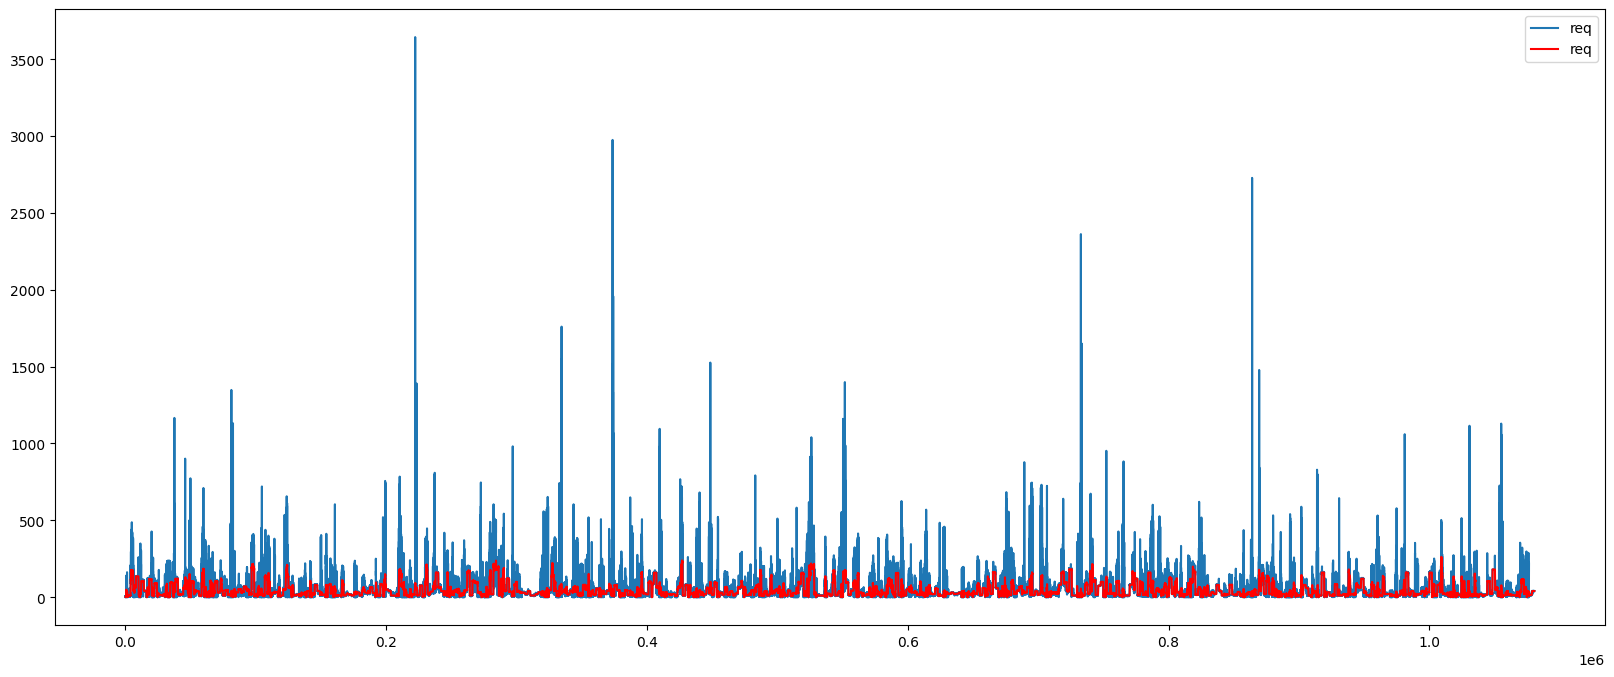

In [53]:
_, ax = plt.subplots(figsize = (20,8))
bo_flat_invocations.plot(y="req", ax = ax)
bo_flat_invocations.rolling(window = 144).mean(numeric_only=True).plot(
  y = "req",
  color = "r",
  ax = ax
)

In [54]:
len(filtered_invocations["HashOwner"].unique())

536

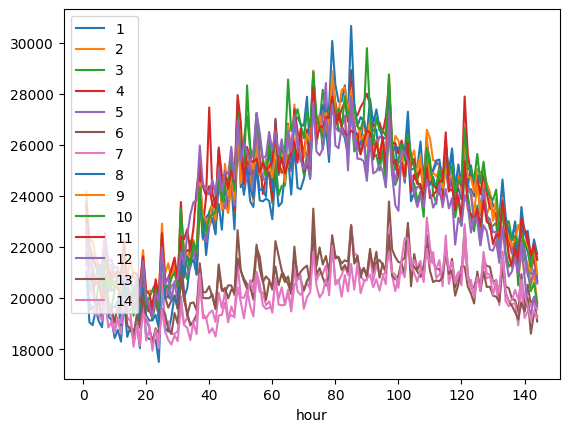

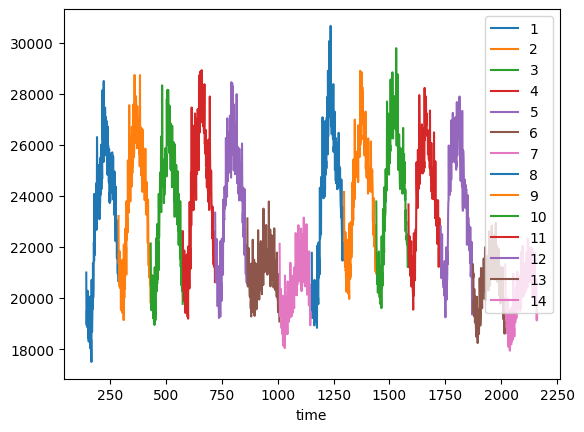

In [77]:
singlenode_req = bo_flat_invocations.groupby(["day", "hour"]).sum(
  numeric_only = True
)

colors = list(mcolors.TABLEAU_COLORS.values())[:7] * 2
_, ax1 = plt.subplots()
_, ax2 = plt.subplots()
for day, df1 in singlenode_req.groupby("day"):
  to_plot = df1.reset_index()
  to_plot.plot(
    x = "hour",
    y = "req",
    ax = ax1,
    label = day,
    color = colors[day - 1]
  )
  to_plot["time"] = to_plot["hour"] + day * to_plot["hour"].max()
  to_plot.plot(
    x = "time",
    y = "req",
    ax = ax2,
    label = day,
    color = colors[day - 1]
  )
# _, ax = plt.subplots(figsize = (20,8))
# bo_flat_invocations.plot(y="req", ax = ax)
# bo_flat_invocations.rolling(window = 144).mean(numeric_only=True).plot(
#   y = "req",
#   color = "r",
#   ax = ax
# )